In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

import context
from ccn import Constraint, ConstraintsGroup
from shapes import Rectangle
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Define the shapes

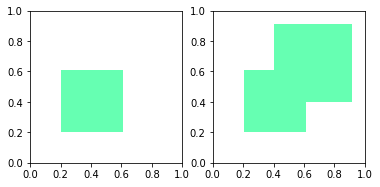

In [2]:
rect0 = Rectangle(0.2, 0.6, 0.2, 0.6)
rect1 = Rectangle(0.4, 0.9, 0.4, 0.9)
combined = rect0 | rect1
shapes = [rect0, combined]

fig, ax = plt.subplots(1, len(shapes))
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()

constraints1 = [ConstraintsGroup([Constraint('1 :- 0')])]
constraints2 = [ConstraintsGroup([Constraint('n0 :- n1')])]

### Define the neural network

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model1 = NeuralNetwork()
model2 = NeuralNetwork()
print(model1)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=2, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

Epoch 1
-------------------------------
loss: 0.639925 [    0/10000]
loss: 0.595419 [ 6400/10000]
Test Error: 
 Accuracy: 83.9%, 61.4%
 Avg loss: 0.008600 

Epoch 2
-------------------------------
loss: 0.495495 [    0/10000]
loss: 0.594369 [ 6400/10000]
Test Error: 
 Accuracy: 83.9%, 58.5%
 Avg loss: 0.008516 

Epoch 3
-------------------------------
loss: 0.489317 [    0/10000]
loss: 0.595912 [ 6400/10000]
Test Error: 
 Accuracy: 83.9%, 58.8%
 Avg loss: 0.008494 

Epoch 4
-------------------------------
loss: 0.488061 [    0/10000]
loss: 0.596002 [ 6400/10000]
Test Error: 
 Accuracy: 83.9%, 59.9%
 Avg loss: 0.008397 

Epoch 5
-------------------------------
loss: 0.484105 [    0/10000]
loss: 0.595624 [ 6400/10000]
Test Error: 
 Accuracy: 83.9%, 66.0%
 Avg loss: 0.008050 

Epoch 6
-------------------------------
loss: 0.466842 [    0/10000]
loss: 0.575114 [ 6400/10000]
Test Error: 
 Accuracy: 83.9%, 73.5%
 Avg loss: 0.007465 

Epoch 7
-------------------------------
loss: 0.431551 [  

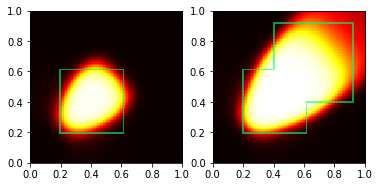

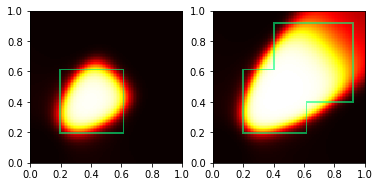

In [4]:
experiment = Experiment('rectangles', model1, shapes, constraints1)
experiment.run(50, device)
#experiment.save(dir='./models/')

Epoch 1
-------------------------------
loss: 0.674403 [    0/10000]
loss: 0.448892 [ 6400/10000]
Test Error: 
 Accuracy: 83.1%, 64.0%
 Avg loss: 0.008612 

Epoch 2
-------------------------------
loss: 0.689703 [    0/10000]
loss: 0.403628 [ 6400/10000]
Test Error: 
 Accuracy: 83.1%, 59.2%
 Avg loss: 0.008058 

Epoch 3
-------------------------------
loss: 0.657603 [    0/10000]
loss: 0.398129 [ 6400/10000]
Test Error: 
 Accuracy: 83.1%, 59.1%
 Avg loss: 0.007926 

Epoch 4
-------------------------------
loss: 0.647248 [    0/10000]
loss: 0.395589 [ 6400/10000]
Test Error: 
 Accuracy: 83.1%, 59.2%
 Avg loss: 0.007845 

Epoch 5
-------------------------------
loss: 0.641290 [    0/10000]
loss: 0.394173 [ 6400/10000]
Test Error: 
 Accuracy: 83.1%, 64.0%
 Avg loss: 0.007774 

Epoch 6
-------------------------------
loss: 0.638108 [    0/10000]
loss: 0.394223 [ 6400/10000]
Test Error: 
 Accuracy: 83.1%, 64.0%
 Avg loss: 0.007703 

Epoch 7
-------------------------------
loss: 0.632457 [  

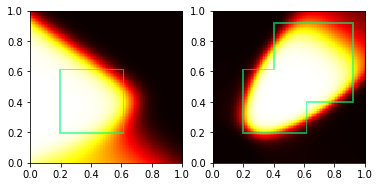

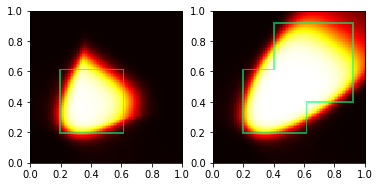

In [5]:
experiment = Experiment('rectangles-rev', model2, shapes, constraints2)
experiment.run(50, 'cpu')
#experiment.save(dir='./models/')